# Dell Assessment

In [131]:
import pandas as pd
import numpy as np
import pyrsm as rsm
import matplotlib.pyplot as plt
import seaborn as sns


#  Data Exploration and Cleaning

### Basic summary statistics


In [98]:
# loading the data 
df = pd.read_csv('Dell_ADSE_DS_DE_MLE_dataset.csv')
df.head()

,asst_id,product_type,mnfture_wk,contract_st,contract_end,contact_wk,contact_type,issue_type,topic_category,parts_sent,repair_type,repeat_ct,parts_ct,agent_tenure_indays,contact_manager_flg,diagnostics,repeat_parts_sent,region,country
0,0,Laptops,201726,201726,202125,201840,Voice,NaN,NaN,"Hard Drive, Documentation(2)",Hard,0,3,1018.0,0,Not_USED,NaN,Hogwarts,NaN
1,1,Laptops,201650,201650,201949,201840,Voice,NaN,NaN,"Speaker, Chassis",Hard,0,2,1018.0,0,Not_USED,NaN,Hogwarts,Zonko's Joke Shop
2,2,Laptops,201821,201821,202222,201840,Voice,NaN,NaN,Cables,Hard,0,1,1018.0,0,Not_USED,"Motherboard, Miscellaneous(2), Hard Drive, Cha...",Hogwarts,Zonko's Joke Shop
3,3,Laptops,201608,201608,201908,201840,VOICE,Hard Drive,Booting,Hard Drive,Hard,0,1,298.0,0,Effective_Usage,NaN,Hogwarts,Zonko's Joke Shop
4,4,Laptops,201732,201732,202032,201840,Voice,NaN,NaN,Battery (Notebook),Hard,0,1,1018.0,0,Not_USED,NaN,Hogwarts,Zonko's Joke Shop


In [99]:
# Overview of the data: column data types, non-null values, etc.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   asst_id              100000 non-null  int64  
 1   product_type         99980 non-null   object 
 2   mnfture_wk           100000 non-null  int64  
 3   contract_st          100000 non-null  int64  
 4   contract_end         100000 non-null  int64  
 5   contact_wk           100000 non-null  int64  
 6   contact_type         99986 non-null   object 
 7   issue_type           85958 non-null   object 
 8   topic_category       66916 non-null   object 
 9   parts_sent           54566 non-null   object 
 10  repair_type          100000 non-null  object 
 11  repeat_ct            100000 non-null  int64  
 12  parts_ct             100000 non-null  int64  
 13  agent_tenure_indays  99986 non-null   float64
 14  contact_manager_flg  100000 non-null  int64  
 15  diagnostics       

In [100]:
# Summary statistics for numerical columns
rsm.describe(df)
# df.describe()

No description attribute available


,asst_id,mnfture_wk,contract_st,contract_end,contact_wk,repeat_ct,parts_ct,agent_tenure_indays,contact_manager_flg
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.00000,99986.000000,100000.000000
mean,35702.117890,201672.108910,201671.595910,201951.897740,201840.0,0.074090,1.15955,985.886844,0.012430
std,25038.092288,156.139692,158.940598,186.777325,0.0,0.262491,1.56942,862.044503,0.110795
min,0.000000,201001.000000,200547.000000,201006.000000,201840.0,0.000000,0.00000,218.000000,0.000000
25%,12382.750000,201612.000000,201612.000000,201903.000000,201840.0,0.000000,0.00000,536.000000,0.000000
50%,32898.500000,201719.000000,201720.000000,201938.000000,201840.0,0.000000,1.00000,801.000000,0.000000
75%,57701.250000,201808.000000,201809.000000,202045.000000,201840.0,0.000000,2.00000,1018.000000,0.000000
max,82441.000000,201927.000000,202630.000000,202953.000000,201840.0,3.000000,51.00000,8922.000000,1.000000


In [101]:
# Count of missing values in each column
missing_values = df.isnull().sum()
missing_values


asst_id                    0
product_type              20
mnfture_wk                 0
contract_st                0
contract_end               0
contact_wk                 0
contact_type              14
issue_type             14042
topic_category         33084
parts_sent             45434
repair_type                0
repeat_ct                  0
parts_ct                   0
agent_tenure_indays       14
contact_manager_flg        0
diagnostics                0
repeat_parts_sent      86654
region                     3
country                10002
dtype: int64

### Dealing with missing values

#### Product type


In [102]:
# Filling missing values with a new category called "Not Specified". 
df['product_type'].fillna('Not Specified', inplace=True)
print(df['product_type'].value_counts(dropna=False))


product_type
Laptops              73052
Desktops             23601
Other Electronics     3327
Not Specified           20
Name: count, dtype: int64


- This keeps the missing values identifiable and doesn't add bias to existing categories.

#### Contact type

In [103]:
print(df['contact_type'].value_counts(dropna=False))


contact_type
VOICE      69757
CHAT       14425
Voice      14405
EMAIL       1281
Unknown      118
NaN           14
Name: count, dtype: int64


In [104]:
# Dealing with case sensitivity and combining Nan and unknown together
df['contact_type'] = df['contact_type'].str.upper()
df['contact_type'].fillna('UNKNOWN', inplace=True)
print(df['contact_type'].value_counts(dropna=False))


contact_type
VOICE      84162
CHAT       14425
EMAIL       1281
UNKNOWN      132
Name: count, dtype: int64


#### Issue type and topic category

In [105]:
print(df['issue_type'].value_counts(dropna=False))


issue_type
NaN                                 14042
System Board Components             13076
Fee Based Support                   10188
Operating System                     9707
Audio, Video, Speakers, TV Tuner     8492
                                    ...  
Compellent - Hardware                   2
Never Shipped / Fulfilled               2
Try & Buy                               1
MWD                                     1
Lost / Stolen in Transit                1
Name: count, Length: 83, dtype: int64


- `issue_type` column has a lot of NaN values. I have  decided to fill them with the placeholder value `Unknown`. This makes sense since not every customer might be able to identify the exact issue or the issue might be unspecified.

In [106]:
df['issue_type'].fillna('Unknown', inplace=True)


In [107]:
print(df['topic_category'].value_counts(dropna=False))

topic_category
NaN                     33084
Booting                 15343
LCD/Monitor              5452
Call Logs                4837
General Queries          4141
                        ...  
Sim Card                    6
Firmware                    5
System Configuration        3
Vmware                      2
Miracast                    1
Name: count, Length: 64, dtype: int64


In [108]:
# Checking the relationship between topic_category and issue_type
grouped = df.groupby('topic_category')['issue_type'].value_counts()
print(grouped)


topic_category  issue_type                                      
AC Adaptor      Power Subsystem / Cables / AC Adapter               147
                System Board Components                              37
                Fee Based Support                                     9
                Input Device / Webcam                                 7
                Hard Drive                                            7
                                                                   ... 
Webcam          Dell Mobile Devices                                   1
                CFA, MFA (Customer or Manufacturer) Field Action      1
                Battery / CMOS                                        1
                Backup / Recovery Software                            1
                Adobe                                                 1
Name: count, Length: 1366, dtype: int64


In [109]:
# Find the most common issue_type for each topic_category
common_issues = df.groupby('topic_category')['issue_type'].apply(lambda x: x.mode()[0])

# Display the mapping
print(common_issues)


topic_category
AC Adaptor                      Power Subsystem / Cables / AC Adapter
Antivirus                               Security / Antivirus Software
App/Software                                        Fee Based Support
Audio Device                         Audio, Video, Speakers, TV Tuner
BIOS                                          System Board Components
                                                ...                  
Touchscreen                          Audio, Video, Speakers, TV Tuner
USB                                           System Board Components
Virus/Adware/Malware/Spyware                        Fee Based Support
Vmware                                             Information Status
Webcam                                          Input Device / Webcam
Name: issue_type, Length: 63, dtype: object


In [110]:
# the most common topic_category for each issue_type
common_topics = df.groupby('issue_type')['topic_category'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else "Unknown")
print(common_topics)


issue_type
Adobe                                       App/Software
Audio, Video, Speakers, TV Tuner             LCD/Monitor
Backplane                                        Booting
Backup / Archive / Data Management               Booting
Backup / Recovery Software                       Booting
                                             ...        
Systems Management                               Booting
Tape Drive or Library                            Booting
Try & Buy                                        Unknown
Unknown                                          Booting
Wrong Solution / Product Sold         Incorrect Shipment
Name: topic_category, Length: 83, dtype: object


In [111]:
# Setting 'topic_category' as 'Unknown' only where 'issue_type' is 'Unknown' and 'topic_category' is NaN
df.loc[(df['issue_type'] == 'Unknown') & (df['topic_category'].isna()), 'topic_category'] = 'Unknown'

- Creating a Series that maps each `issue_type` to its most common `topic_category` using the `common_topics` mapping I generated.


In [112]:
# Filling NaN values in topic_category using the mapping from issue_type
df['topic_category'] = df['topic_category'].fillna(df['issue_type'].map(common_topics))
print(df['topic_category'].value_counts(dropna=False))


topic_category
Booting                 24040
Unknown                 14019
LCD/Monitor              7512
General Queries          5920
Call Logs                5463
                        ...  
Stylus                      6
Firmware                    5
System Configuration        3
Vmware                      2
Miracast                    1
Name: count, Length: 64, dtype: int64


In [113]:
print(df['topic_category'].isna().sum())


0


#### Parts Sent

In [114]:
print(df['parts_sent'].value_counts(dropna=False))


parts_sent
NaN                                                                                                                                    45434
Hard Drive                                                                                                                              4504
Motherboard, Documentation                                                                                                              4405
LCD Panel                                                                                                                               3022
Keyboard                                                                                                                                2981
                                                                                                                                       ...  
Miscellaneous(2), Mechanical Hardware, Electrical Components                                                                               1
Mo

##### Hypothesis
- Assuming if there's no entry in the `parts_sent` column, it could very well indicate that no parts were sent to the customer. 
- This is especially plausible if the nature of the issue didn't require a physical part replacement or if troubleshooting resolved the issue without the need for sending out parts.

##### To support this hypothesis Cross-referencing with `repair_type` column. 
- For example, if there's a column that indicates the problem was resolved without hardware intervention or if the `repair_type` suggests a software fix, then that supports the idea that no parts were needed.

In [115]:
# Checking unique values of repair type
print(df['repair_type'].value_counts())


repair_type
Hard    59495
Soft    40505
Name: count, dtype: int64


In [116]:
# parts sent for "Soft" repairs
print(df[df['repair_type'] == 'Soft']['parts_sent'].value_counts(dropna=False).head())


parts_sent
NaN    40505
Name: count, dtype: int64


In [117]:
# parts sent for "Hard" repairs
print(df[df['repair_type'] == 'Hard']['parts_sent'].value_counts(dropna=False).head())


parts_sent
NaN                           4929
Hard Drive                    4504
Motherboard, Documentation    4405
LCD Panel                     3022
Keyboard                      2981
Name: count, dtype: int64


- This reinforces the hypothesis that for `Soft` repairs, no parts are typically required (since it might be software or configuration issues). Hence, the NaN values in the parts_sent column can be interpreted as  `No Parts Sent` specifically for `Soft` repairs.

##### For `Hard` repairs, there are still 4929 instances where no parts are specified. This could be due to various reasons:

- Maybe the repair required an onsite visit without replacing parts.
- It could be a data entry error.
- Some other procedural reasons.

In [118]:
# Replacing NaN for Soft repairs
df.loc[df['repair_type'] == 'Soft', 'parts_sent'] = df.loc[df['repair_type'] == 'Soft', 'parts_sent'].fillna('No Parts Sent')

# Replacing NaN for Hard repairs
df.loc[df['repair_type'] == 'Hard', 'parts_sent'] = df.loc[df['repair_type'] == 'Hard', 'parts_sent'].fillna('Not Specified')


####  Agent tenure in days

In [119]:
# since there are only 14 missing values using simple imputation with central tendency
median_tenure = df['agent_tenure_indays'].median()
df['agent_tenure_indays'].fillna(median_tenure, inplace=True)


#### Repeat parts sent

In [120]:
print(df['repeat_parts_sent'].value_counts(dropna=False))

repeat_parts_sent
NaN                                                             86654
Motherboard, Documentation                                       1081
Motherboard                                                       655
LCD Panel                                                         649
Chassis                                                           605
                                                                ...  
Motherboard(4), Miscellaneous(2), Heatsink(3), Documentation        1
Motherboard, Miscellaneous, Documentation, Chassis(2)               1
Hard Drive, Electrical Components, Documentation(2)                 1
PCBA - Misc., Chassis, Cables                                       1
Mouse, LCD Panel, Hard Drive, Chassis, Cables(2)                    1
Name: count, Length: 1562, dtype: int64


The majority of the values in the `repeat_parts_sent` column are missing (NaN). This means that for a large number of cases, no parts were sent on a repeat visit. This can be indicative of one of two scenarios:

- There was no repeat visit required, hence no parts were sent.
- There was a repeat visit, but no parts were sent during the repeat.

In [121]:
# For rows where Repeat_ct is 0 and repeat_parts_sent is NaN
df.loc[(df['repeat_ct'] == 0) & (df['repeat_parts_sent'].isnull()), 'repeat_parts_sent'] = 'No Repeat Visit'
# Checking null values
print(df['repeat_parts_sent'].isna().sum()) 


183


In [122]:
# For rows where Repeat_ct is greater than 0 and repeat_parts_sent is NaN
df.loc[(df['repeat_ct'] > 0) & (df['repeat_parts_sent'].isnull()), 'repeat_parts_sent'] = 'No Parts Sent on Repeat'
# Checking null values
print(df['repeat_parts_sent'].isna().sum()) 

0


##### There are few cases where there were no additional visits but parts sent on additional visit have values
- Marking this as one of the anomalies, need to do further analysis to understand the pattern


In [123]:
# Number of entries where Repeat_ct is 0 but repeat_parts_sent is not NaN
anomalies = df[(df['repeat_ct'] == 0) & (~df['repeat_parts_sent'].isnull())]
print(len(anomalies))


92603



- Analyzed columns `repeat_parts_sent` and `repeat_ct` from the dataset.
- Definitions:
  - `repeat_parts_sent`: Parts sent on additional visits.
  - `repeat_ct`: Number of additional visits required post the initial one.
- Identified inconsistency:
  - 92,603 entries where `repeat_ct` is 0 but `repeat_parts_sent` has values.
- Potential implications:
  - Data collection or input error.
  - Preemptive parts sent to customers without an additional visit.
  - Misinterpretation or misuse of the `repeat_ct` field.


### Region and Country

In [124]:
# using crosstab to check the number of occurrences of each combination of Country and Region 
cross_tab = pd.crosstab(df['country'], df['region'])
print(cross_tab)


region             Hogwarts  Middle Earth  Milky Way
country                                             
Acrux                     0             0         14
Alcor                     0             0          4
Aldebaran                 0             0          4
Altair                    0             0          3
Antares                   0             0         23
Arcturus                  0             0         20
Becrux                    0             0         30
Bellatrix                 0             0          1
Betelgeuse                0             0          1
Bree                      0             3          0
Canopus                   0             0         12
Capella                   0             0         18
Castor                    0             0          7
Diagon Alley              4             0          0
Erebor                    0             4          0
Fangorn                   0            14          0
Fomalhaut                 0             0     

- There is no one to one relationship between `country` and `region`
- There is no other column that provides location and can't use external knowledge as the data is made up
- Computing most dominant country for each region and vice versa
- Filling missing countries using the dominant country for each region and vice vera

In [125]:
# For missing countries based on region
region_to_dom_country = df.dropna().groupby('region')['country'].apply(lambda x: x.mode().iloc[0])
df['country'] = df['country'].fillna(df['region'].map(region_to_dom_country))

# For missing regions based on country
country_to_dom_region = df.dropna().groupby('country')['region'].apply(lambda x: x.mode().iloc[0])
df['region'] = df['region'].fillna(df['country'].map(country_to_dom_region))


In [126]:
# Checking Nan
df[['region', 'country']].isna().sum()



region     3
country    3
dtype: int64

- Since there are only three values with Nan, dropping these rows would be the best choice
- Replacing them with unknown for now as other columns might have important information


In [127]:
df['country'].fillna('Unknown', inplace=True)
df['region'].fillna('Unknown', inplace=True)

In [128]:
# Ensuring all the missing values are dealt with
df.isnull().sum()

asst_id                0
product_type           0
mnfture_wk             0
contract_st            0
contract_end           0
contact_wk             0
contact_type           0
issue_type             0
topic_category         0
parts_sent             0
repair_type            0
repeat_ct              0
parts_ct               0
agent_tenure_indays    0
contact_manager_flg    0
diagnostics            0
repeat_parts_sent      0
region                 0
country                0
dtype: int64

### Visualizing the data to detect outliers 

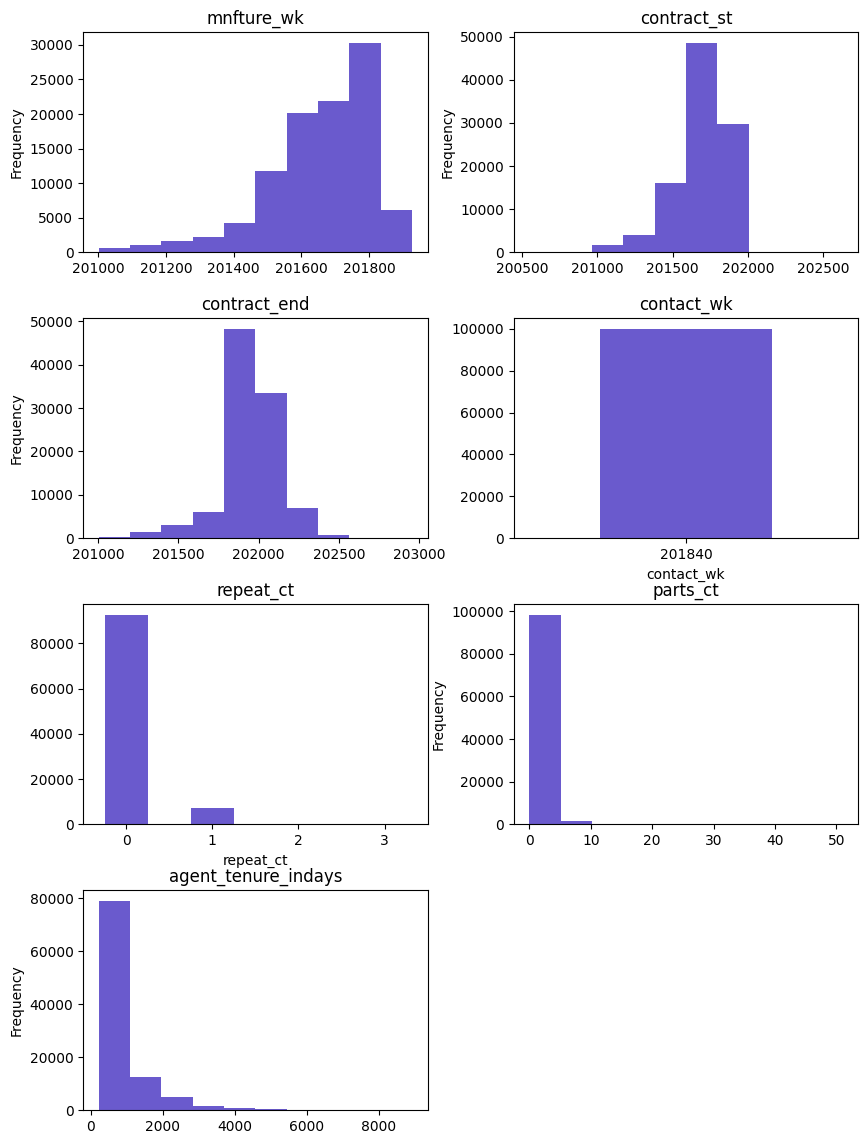

In [134]:
numerical_cols = ['mnfture_wk', 'contract_st', 'contract_end', 'contact_wk', 'repeat_ct', 'parts_ct', 'agent_tenure_indays']
rsm.distr_plot(df[numerical_cols])

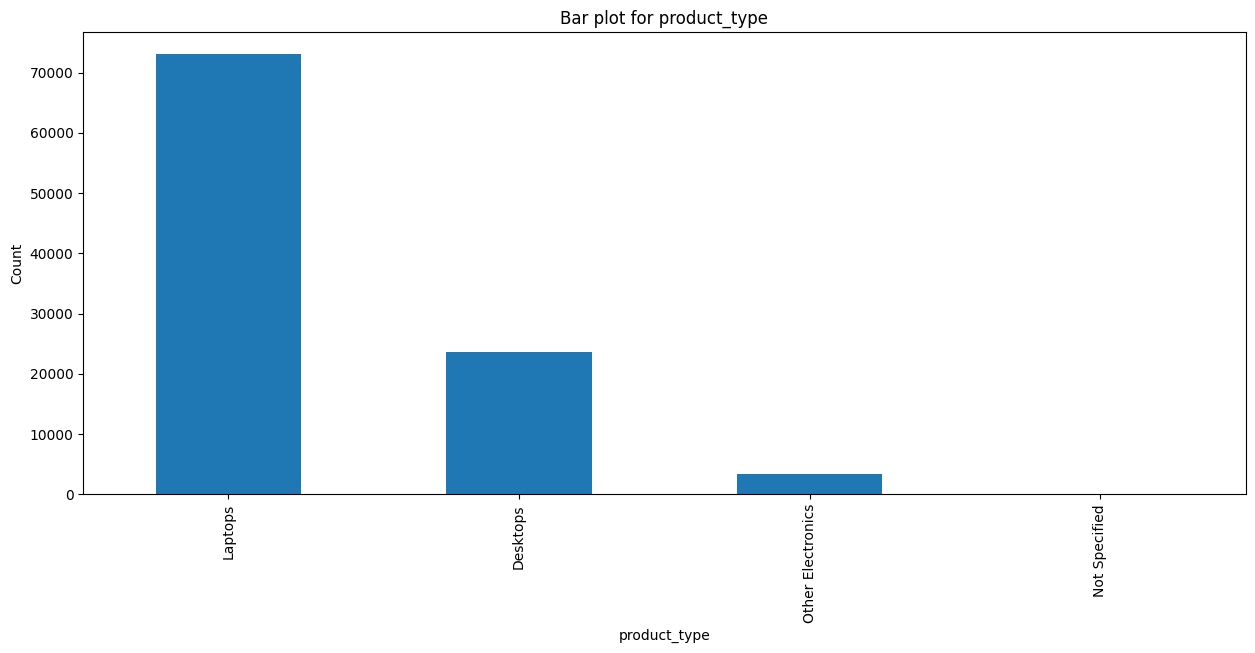

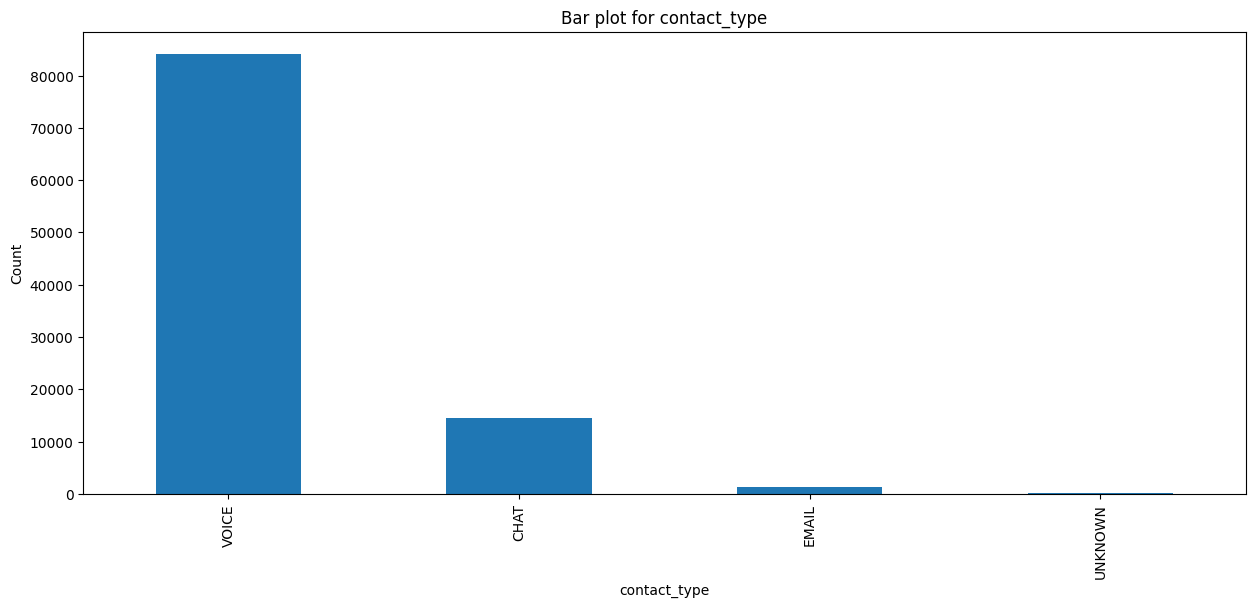

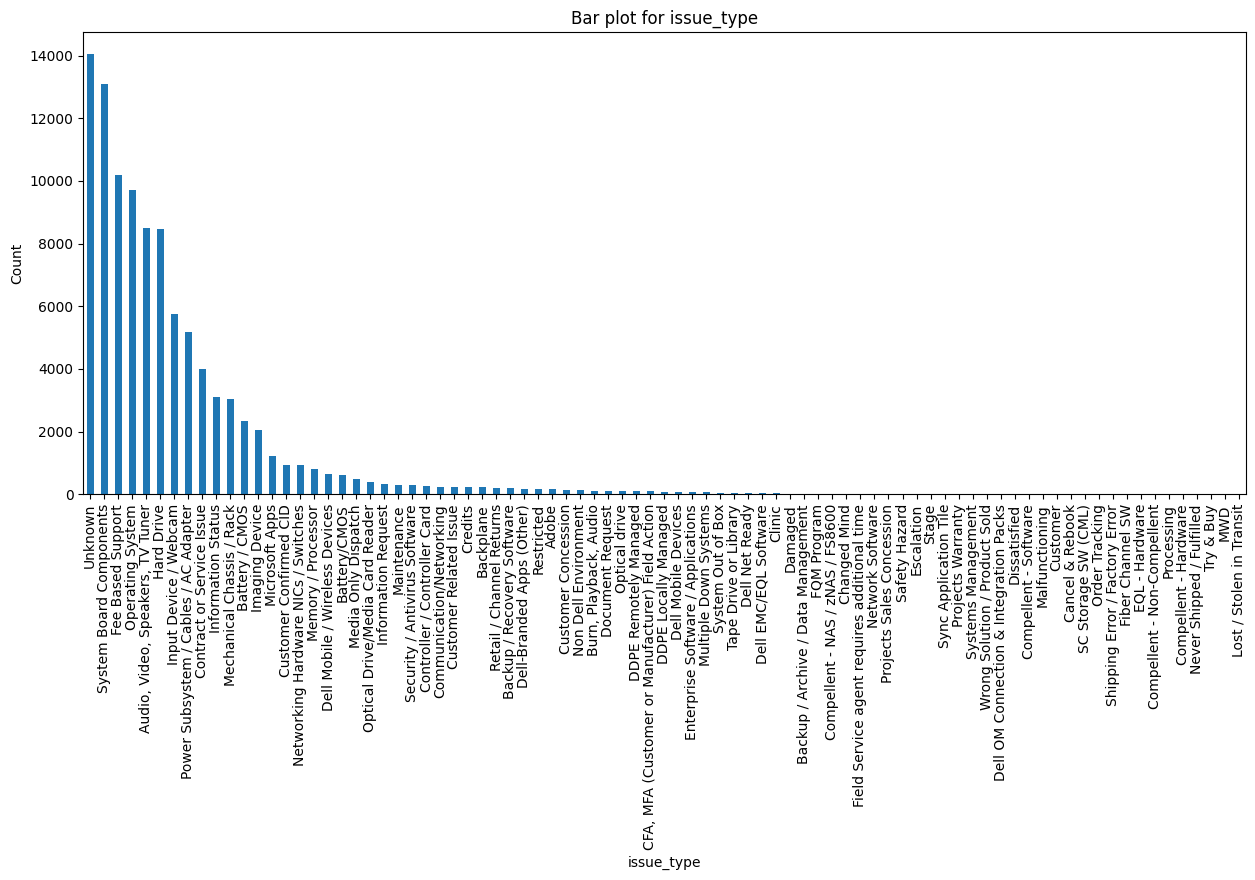

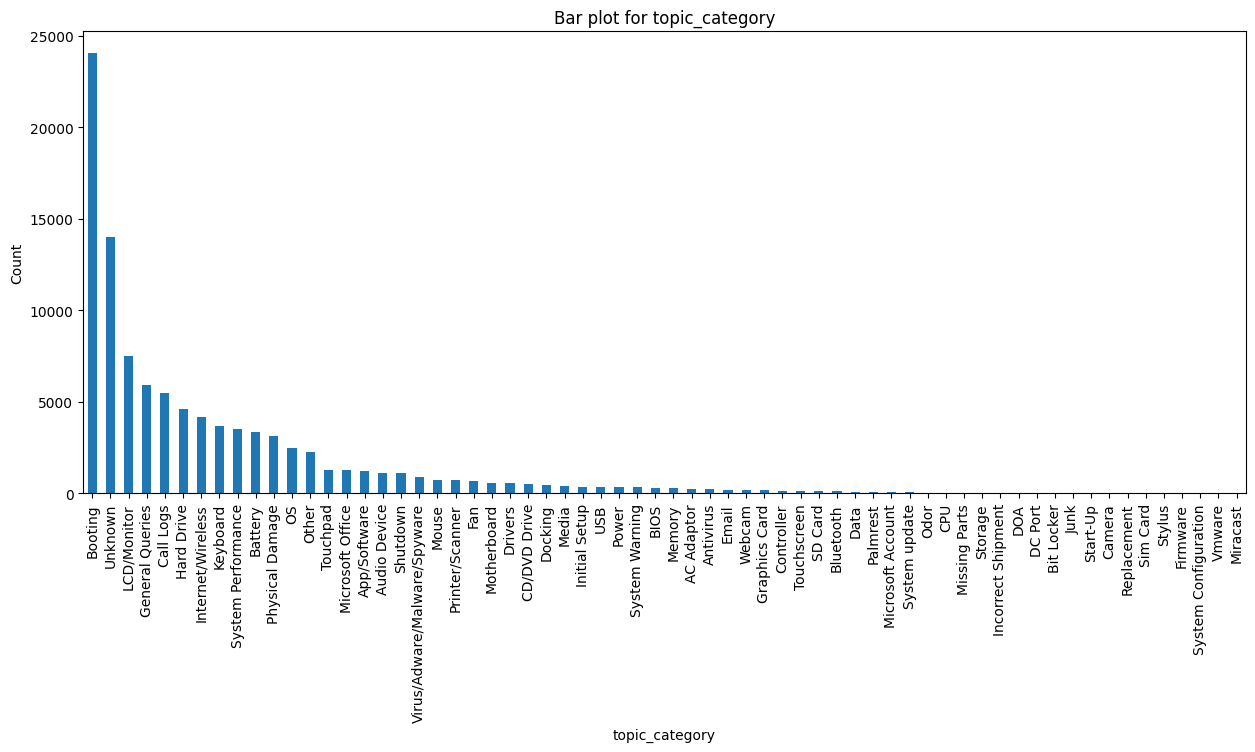

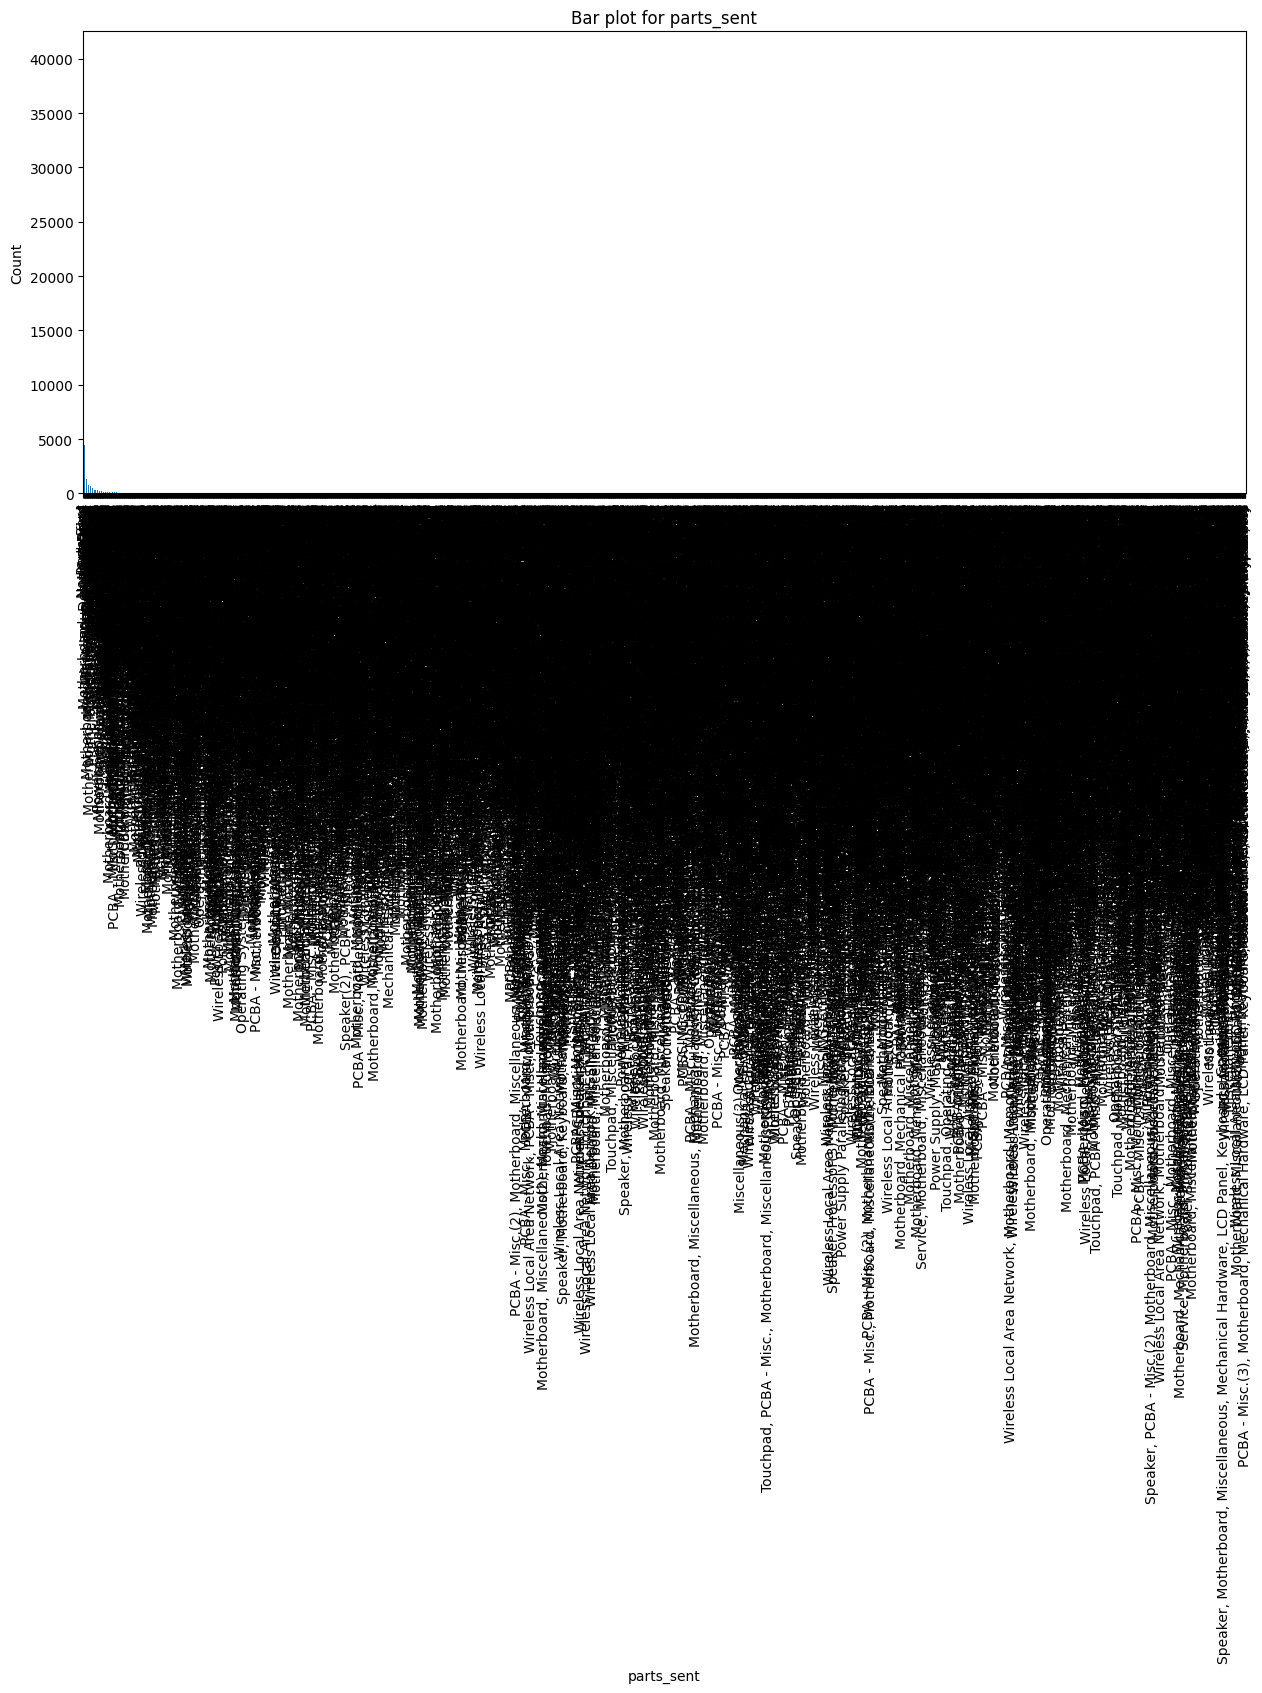

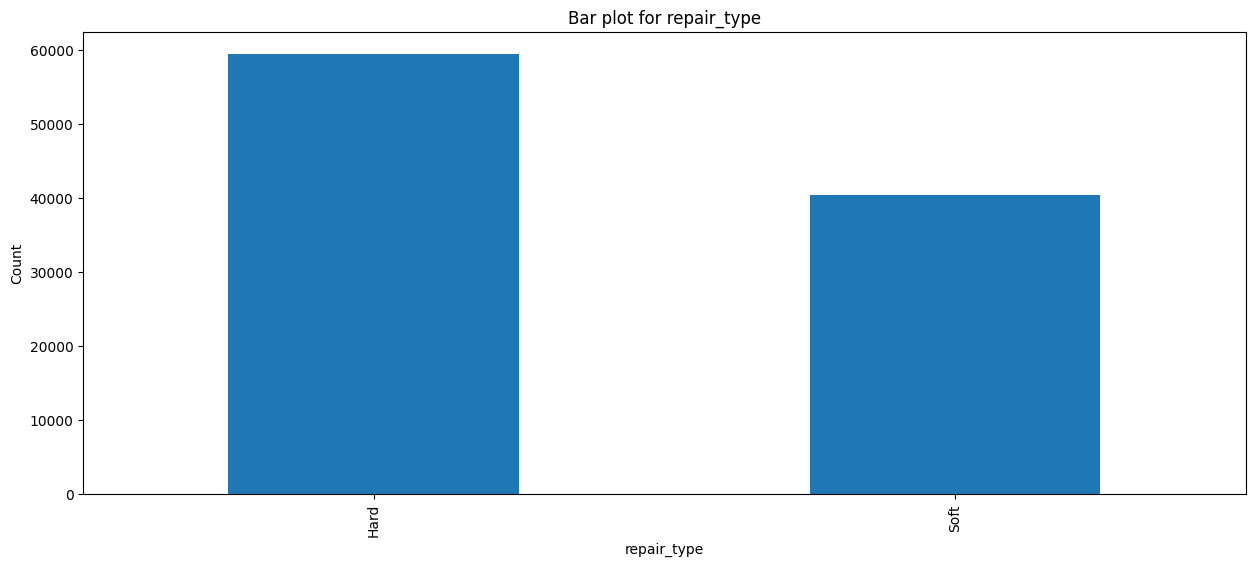

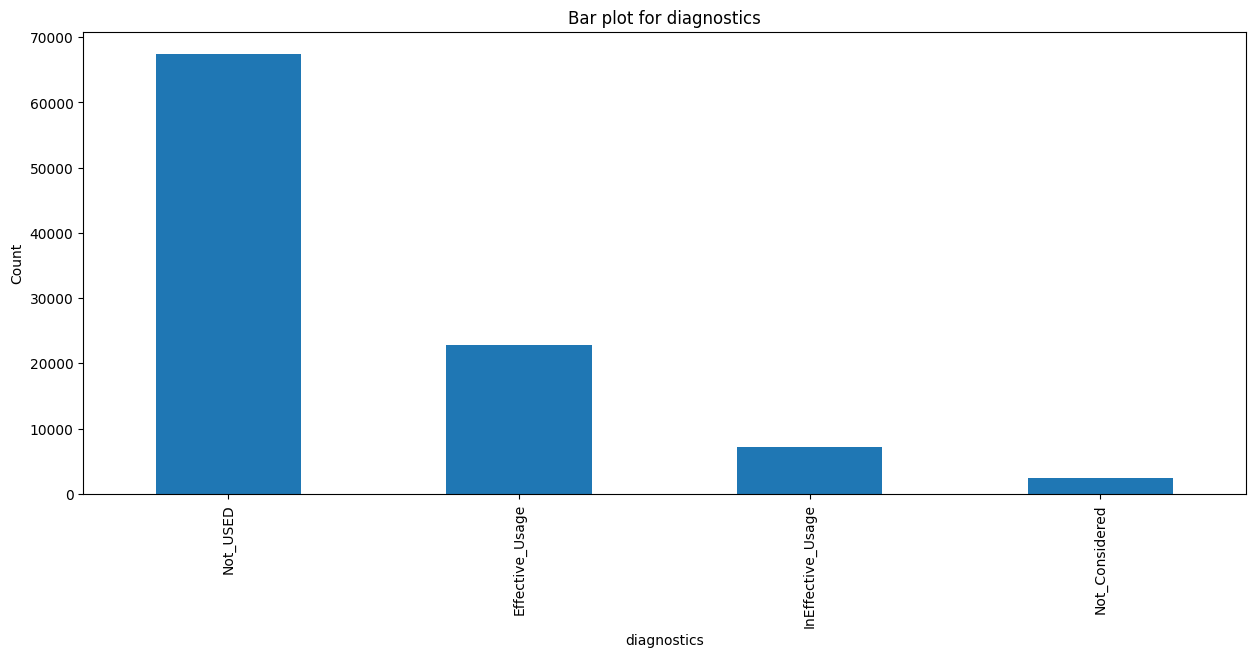

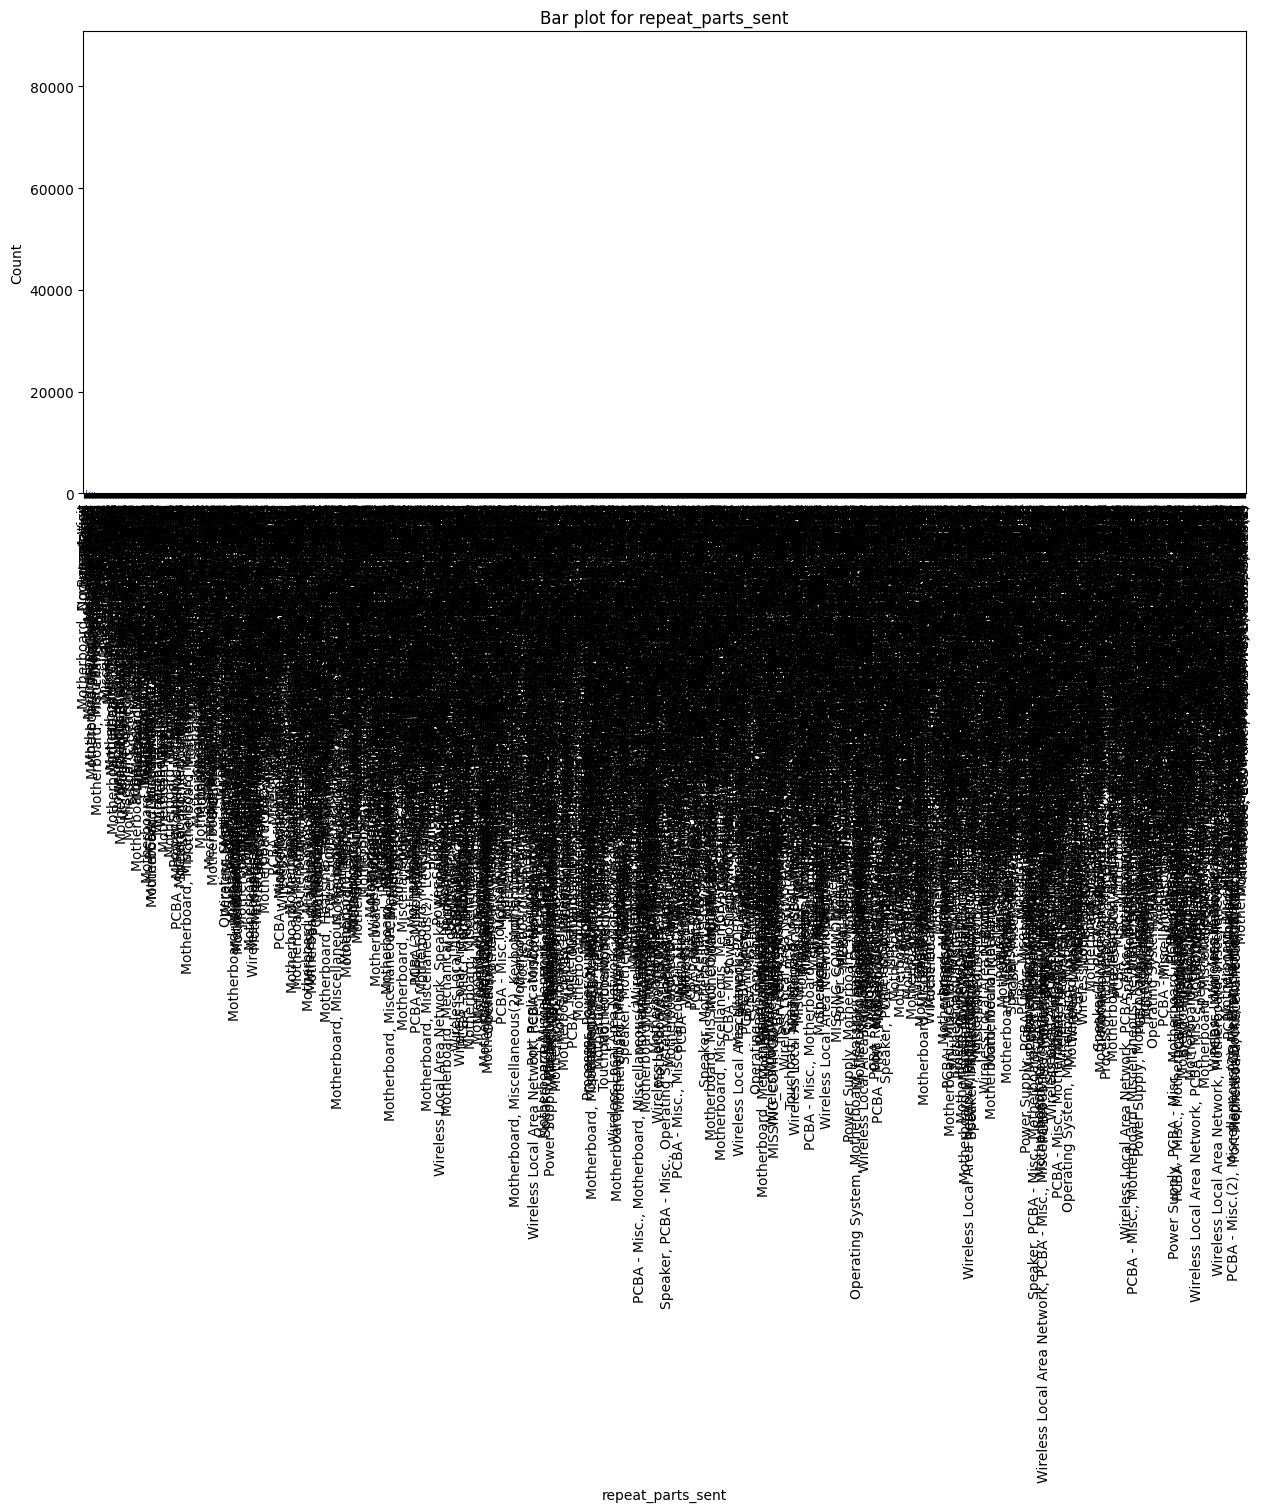

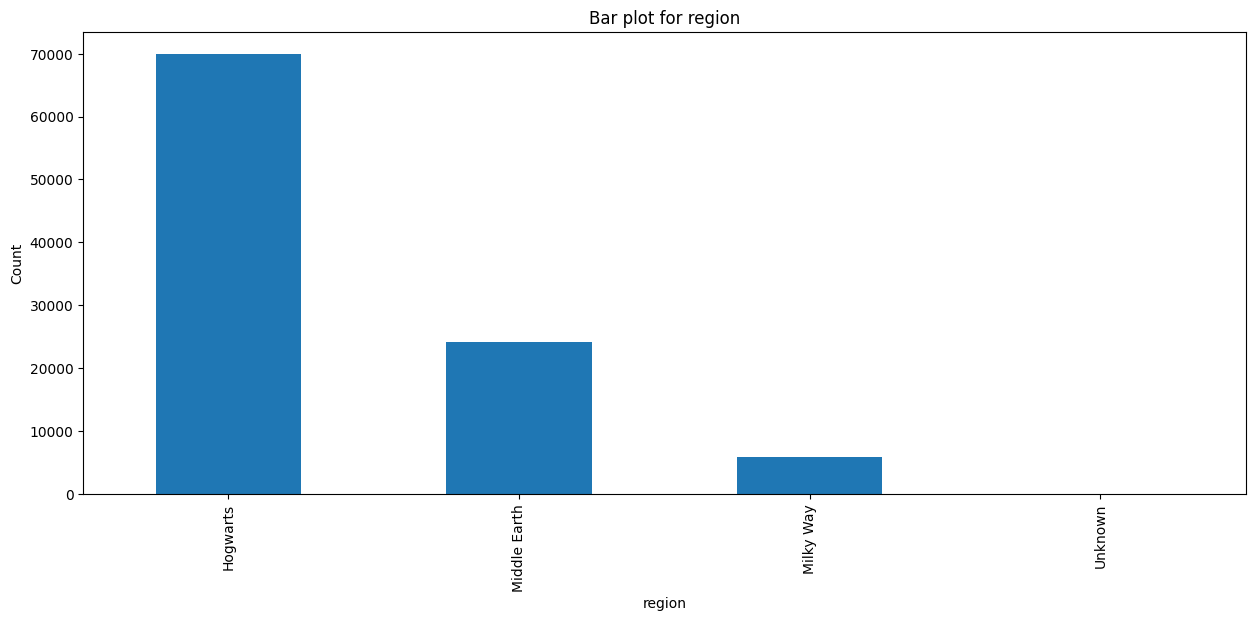

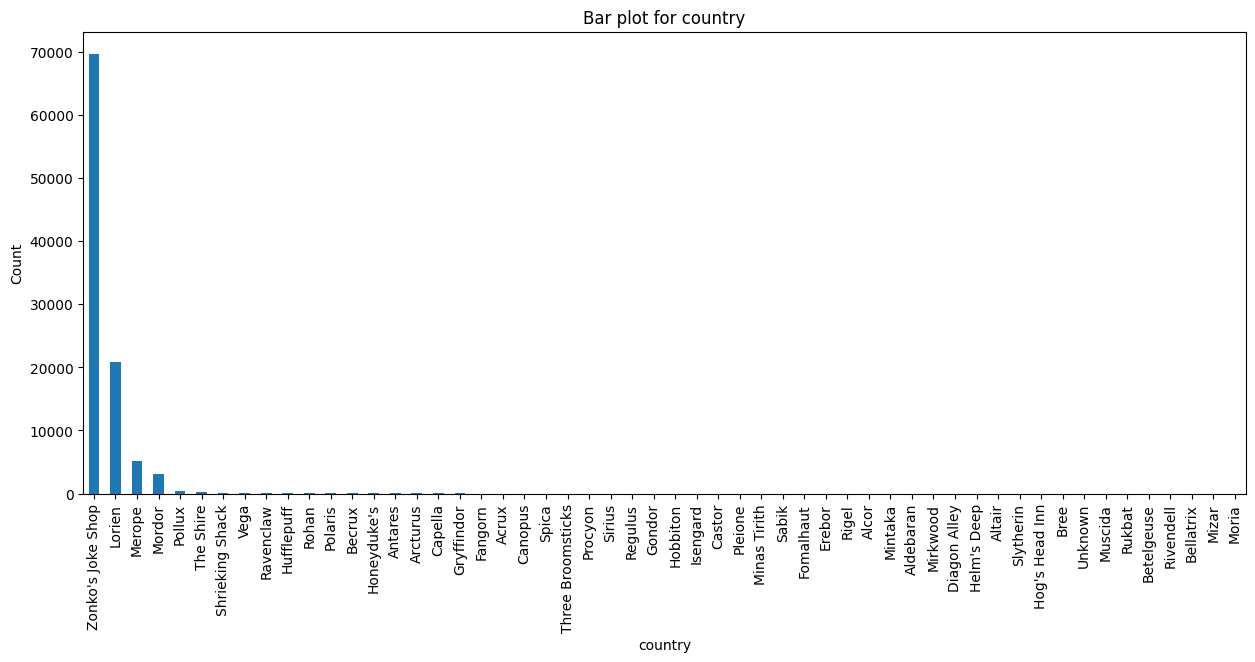

In [135]:
# Categorical columns
categorical_cols = ['product_type', 'contact_type', 'issue_type', 'topic_category', 'parts_sent', 'repair_type', 'diagnostics', 'repeat_parts_sent', 'region', 'country']
for col in categorical_cols:
    plt.figure(figsize=(15, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Bar plot for {col}')
    plt.ylabel('Count')
    plt.show()